In [54]:
import pandas as pd

raw_data = pd.read_csv('TP_1_prostate_dataset.txt', sep='\t')
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [66]:
X = raw_data.iloc[:,1:-2]
y = raw_data.iloc[:,-2]

In [68]:
y

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
92    4.385147
93    4.684443
94    5.143124
95    5.477509
96    5.582932
Name: lpsa, Length: 97, dtype: float64

In [69]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [76]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scale, y, test_size=0.25, random_state=0)

In [77]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
import numpy as np

baseline_error = np.mean((lr.predict(X_test) - y_test)**2)
print(baseline_error)

0.44437009898432456


In [90]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test)**2))

In [91]:
np.argmin(errors)

118

In [92]:
errors[np.argmin(errors)]

0.4147855691427831

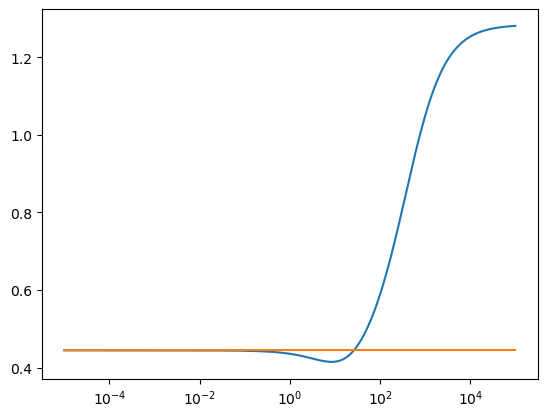

In [93]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')

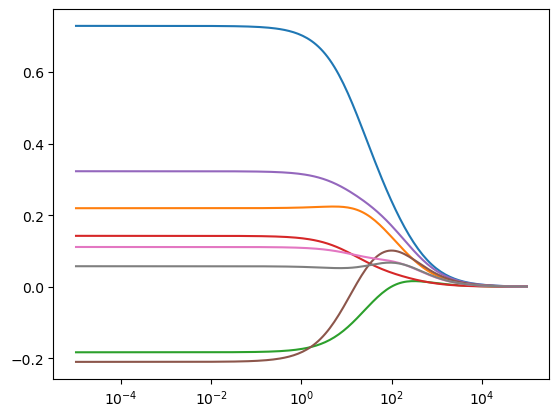

In [94]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

In [102]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso()

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test)**2))

In [103]:
errors[np.argmin(errors)]

0.4218251042521049

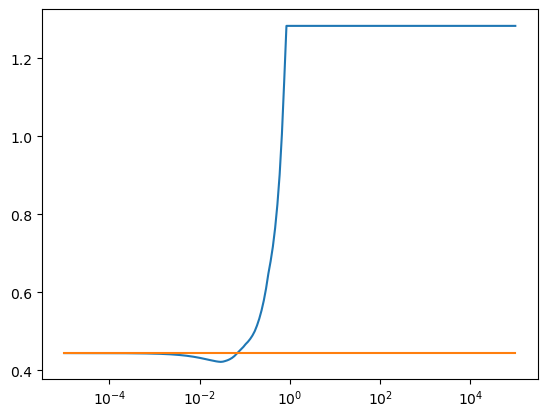

In [104]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')

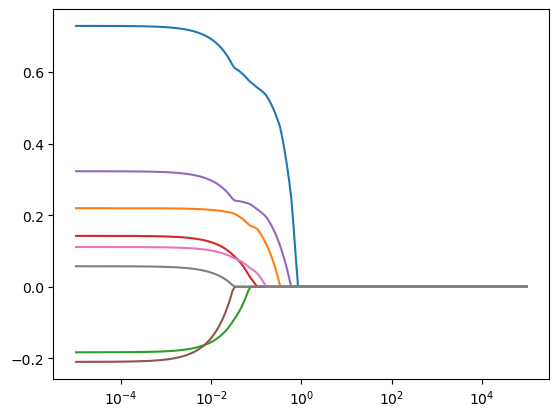

In [105]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

In [126]:
X = np.array([-0.78768, -1.51760513, 0.74416271, -0.62288928])
y= np.array([-34.59703199, -30.79543532, 19.31018182,-19.44809959])

lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [127]:
lr.coef_

array([24.20287954])

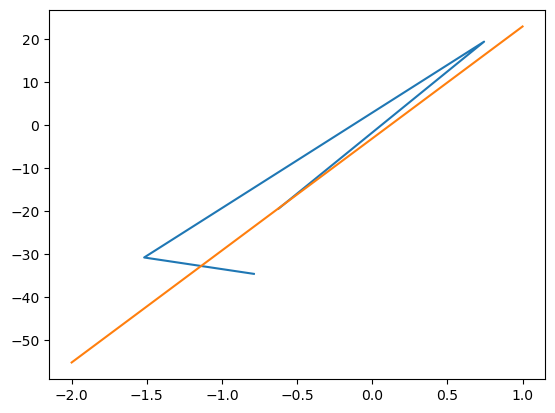

In [130]:
ax = plt.gca()
ax.plot(X, y, [-2, 1], [26*(-2)+lr.intercept_, 26*(1)+lr.intercept_])